# AIML Online Capstone - AUTOMATIC TICKET ASSIGNMENT

# Problem Statement

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the
above Objective. An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of
the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

# Objective
In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

# (1) Install Python Packages

In [133]:
!pip install ftfy
!pip install unidecode
!pip install fasttext
!pip install pyspellchecker
!wget  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2021-08-03 16:13:15--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin.2’

lid.176.bin.2       100%[===================>] 125.18M  12.0MB/s    in 12s     

2021-08-03 16:13:27 (10.8 MB/s) - ‘lid.176.bin.2’ saved [131266198/131266198]



In [134]:
!pip install contractions

#(2) Python Imports


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Markdown, clear_output
import os
import re
import string
from wordcloud import WordCloud,STOPWORDS
# from tqdm.auto import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
from pprint import pprint
import gc

random_state = 2021

import time
import html
import math
from collections import defaultdict
import string
import re
import unicodedata
import random
import ftfy
import fasttext
from unidecode import unidecode
from collections import Counter
import contractions
from textblob import Word
from spellchecker import SpellChecker

from wordcloud import WordCloud,STOPWORDS


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from textblob import Word


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('omw')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning) 
random_state = 2021


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


# (3) File Import and reading

In [136]:
project_path = '/content/drive/MyDrive/Colab Notebooks/Captone_Project'
data_file = 'input_data.xlsx'

In [137]:
df = pd.read_excel(os.path.join(project_path,data_file),'Sheet1')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [22]:
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

#### Observations:
1. There are 8 NaN in Short description and 1 in Description.

### Drop NaN

In [30]:
df = df[(df['Short description'].notna()) & (df['Description'].notna())]
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [31]:
df.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

# (4) EDA Part 1

In [23]:
df[(df['Short description'].isna()) | (df['Description'].isna())]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [24]:
df_group_count = df['Assignment group'].value_counts().to_frame().reset_index().rename(columns={'index':'group','Assignment group':'count'})
df_group_count['Contribution'] = df_group_count['count']/df_group_count['count'].sum()
df_group_count['Cumulative Contribution'] = df_group_count['Contribution'].cumsum(axis=0)
df_group_count[:30]

,group,count,Contribution,Cumulative Contribution
0,GRP_0,3976,0.467765,0.467765
1,GRP_8,661,0.077765,0.545529
2,GRP_24,289,0.034000,0.579529
3,GRP_12,257,0.030235,0.609765
4,GRP_9,252,0.029647,0.639412
5,GRP_2,241,0.028353,0.667765
6,GRP_19,215,0.025294,0.693059
7,GRP_3,200,0.023529,0.716588
8,GRP_6,184,0.021647,0.738235
9,GRP_13,145,0.017059,0.755294


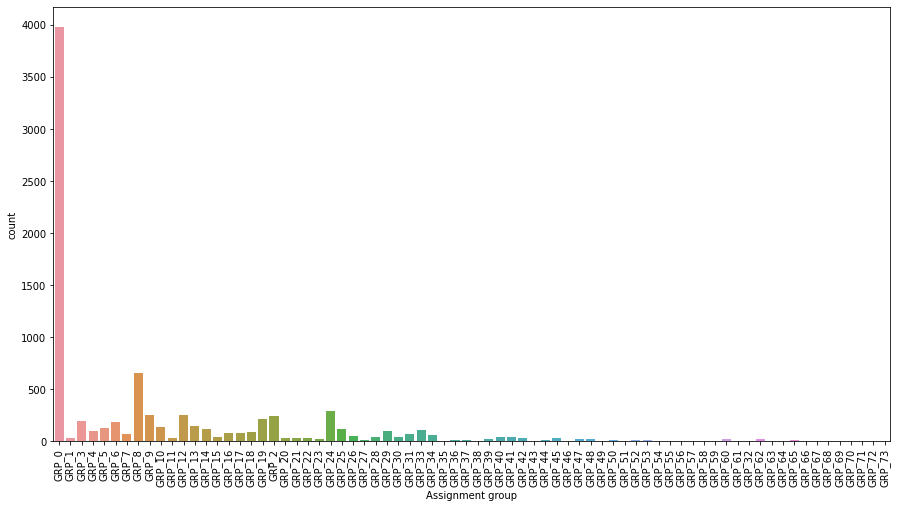

In [25]:
plt.subplots(figsize=(15,8))
sns.countplot(x=df['Assignment group'])
plt.xticks(rotation=90)
plt.show()

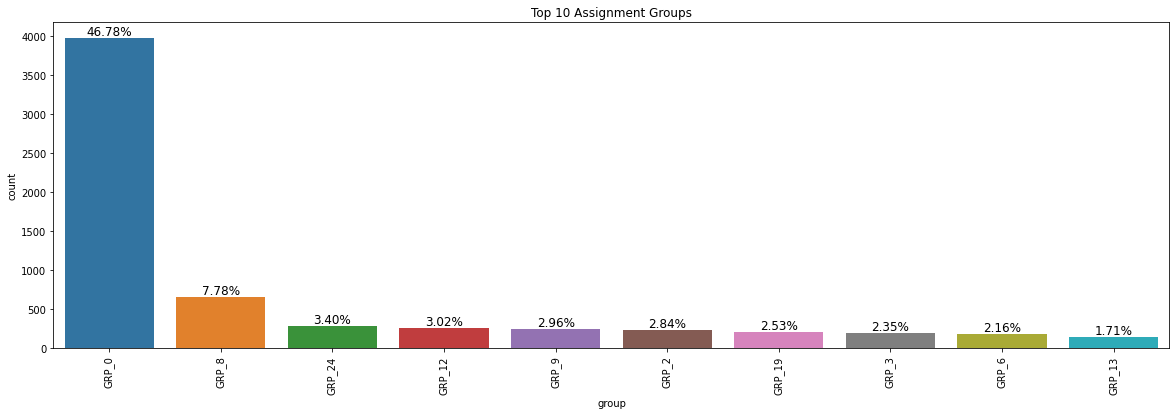

In [26]:
plt.subplots(figsize=(20,6))
ax = sns.barplot(x='group',y='count',data=df_group_count[:10])
rects = ax.patches
labels = df_group_count['Contribution'][:10].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label*100:.2f}%", ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=90)
plt.title("Top 10 Assignment Groups")
plt.show()

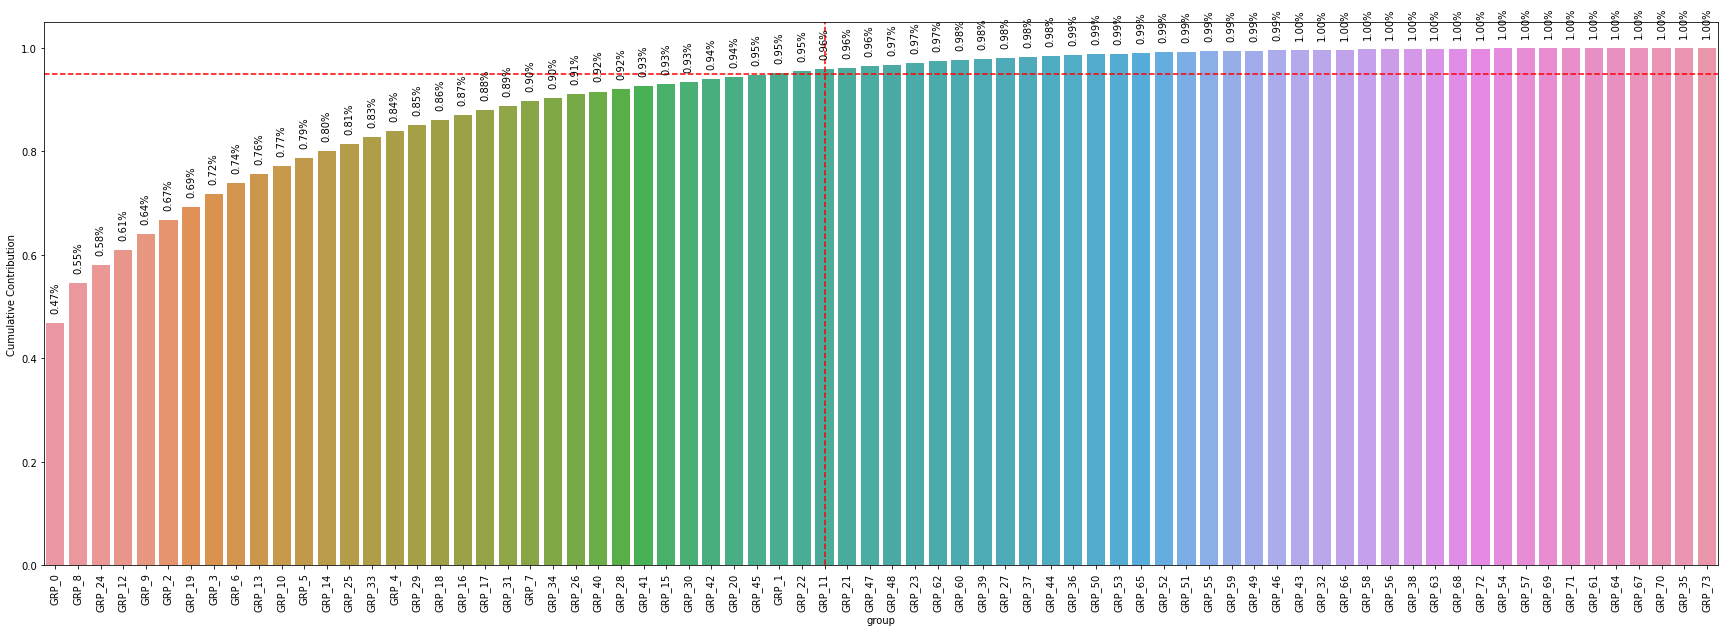

In [27]:
plt.subplots(figsize=(30,10))
ax = sns.barplot(x=df_group_count['group'], y=df_group_count['Cumulative Contribution'])
plt.xticks(rotation=90)
plt.axvline(x=df_group_count[df_group_count['Cumulative Contribution'] < 0.96]['group'].index[-1], linestyle="--",color='red')
plt.axhline(y=0.95,linestyle='--',color='r')
for p in ax.patches:
  ax.annotate(str(format(p.get_height(), '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')


plt.show()

In [132]:
df_group_count[df_group_count['Cumulative Contribution'] <= 0.95].shape

(32, 4)

#### Observations:
1. Gropu0 has maximum tickets of 3976 immediately followed by Group8 of 661.
2. Group1 contributes around 47% and Group8 about 8% of the overall ticketing load.
3. Rest of the groups have 3% of less.
4. Only 32 out of 74 groups contribute to about 95% of the overall tickets.

In [139]:
df['Caller'].nunique()

2950

In [28]:
df_caller_count = df['Caller'].value_counts().to_frame().reset_index().rename(columns={'index':'caller','Caller':'count'})
df_caller_count['Contribution'] = df_caller_count['count']/df_caller_count['count'].sum()
df_caller_count['Cumulative Contribution'] = df_caller_count['Contribution'].cumsum(axis=0)
df_caller_count.head(20)

,caller,count,Contribution,Cumulative Contribution
0,bpctwhsn kzqsbmtp,810,0.095294,0.095294
1,ZkBogxib QsEJzdZO,151,0.017765,0.113059
2,fumkcsji sarmtlhy,134,0.015765,0.128824
3,rbozivdq gmlhrtvp,87,0.010235,0.139059
4,rkupnshb gsmzfojw,71,0.008353,0.147412
5,jloygrwh acvztedi,64,0.007529,0.154941
6,spxqmiry zpwgoqju,63,0.007412,0.162353
7,oldrctiu bxurpsyi,57,0.006706,0.169059
8,olckhmvx pcqobjnd,54,0.006353,0.175412
9,jyoqwxhz clhxsoqy,51,0.006000,0.181412


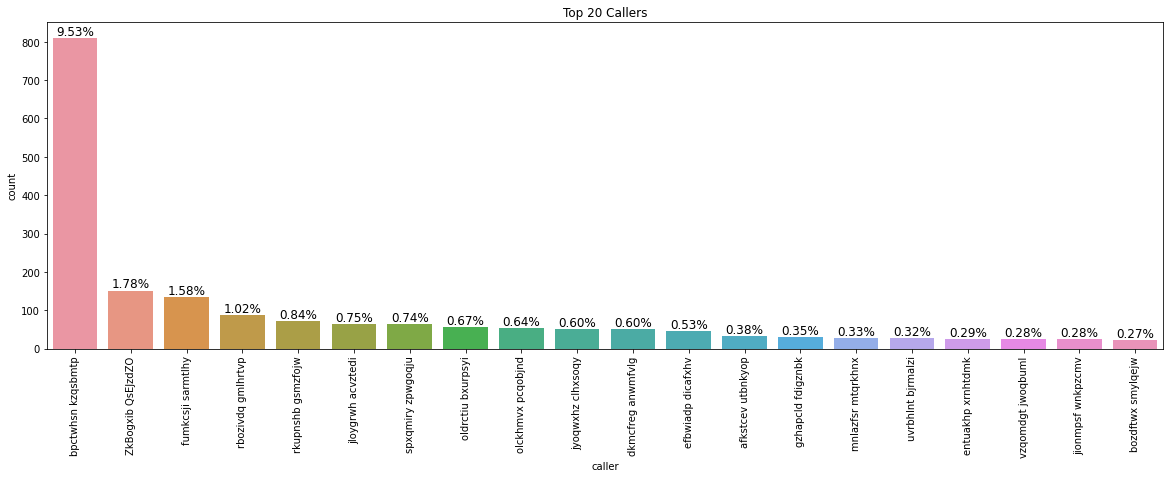

In [29]:
plt.subplots(figsize=(20,6))
ax = sns.barplot(x='caller',y='count',data=df_caller_count[:20])
rects = ax.patches
labels = df_caller_count['Contribution'][:20].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label*100:.2f}%", ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=90)
plt.title("Top 20 Callers")
plt.show()

#### Observations:
1. There are about 2950 unique callers in the data.
2. Just one caller "bpctwhsn kzqsbmtp" is contributing to almost 10% of the overall ticketing load with rest less than 2% each.
3. Top 20 callers contribute to about 22% of the overall ticketing load.


#### Pre-processing Helper Functions

In [32]:
### Fic mojibake texts
def fix_bad_text(text):
  if ftfy.badness.is_bad(text):
    text= ftfy.fix_text(text)
  return text


#### Language detection using FastText
lang_detect_model = fasttext.load_model('lid.176.bin')
def detect_lang(text):
    text = re.sub(r'\r|\t|\n|\\r|\\t|\\n','',text)
    detected_lang = lang_detect_model.predict(text,k=1)[0]
    detected_lang = detected_lang[0].replace('__label__', '')

    if (detected_lang != 'en') :
      # print("Non English",detected_lang,isEnglish(text))
      return detected_lang
    elif (detected_lang == 'en' and isEnglish(text) == True):
      # print("English",detected_lang,isEnglish(text))
      return detected_lang
    elif (isEnglish(text) == False and detected_lang == 'en'):
      # print("Not English",detected_lang,isEnglish(text))
      return 'NE'
    else:
      # print("Not sure",detected_lang,isEnglish(text))
      return None


##### Bulk translation of Non-english texts
def bulk_translate(cols):
  text = cols['combined_description']
  lang = cols['lang']
  trans_status = cols['trans_status']
  
  if not trans_status:
    try:
      if lang == 'en':
          return (text,True)
      else:
          return (translate(text,from_language='auto',to_language='en'),True)
    except:
      print(f"translation Failed : {text}")
      return (text,False)
  else:
    print(f"returining....{cols['trans_status']}")
    return text,cols['trans_status']


### Fix all acented characters
def fix_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)


# Cross check with the language detection if a text has all ASCII chars if not mark them
def isEnglish(text):
    return text.isascii()

### Translation function
import sys
if (sys.version_info[0] < 3):
    import urllib2
    import urllib
    import HTMLParser
else:
    import html
    import urllib.request
    import urllib.parse

agent = {'User-Agent':
         "Mozilla/4.0 (\
compatible;\
MSIE 6.0;\
Windows NT 5.1;\
SV1;\
.NET CLR 1.1.4322;\
.NET CLR 2.0.50727;\
.NET CLR 3.0.04506.30\
)"}

def unescape(text):
    if (sys.version_info[0] < 3):
        parser = HTMLParser.HTMLParser()
    else:
        parser = html
    return (parser.unescape(text))


def translate(to_translate, to_language="auto", from_language="auto"):
    """Returns the translation using google translate
    you must shortcut the language you define
    (French = fr, English = en, Spanish = es, etc...)
    if not defined it will detect it or use english by default
    Example:
    print(translate("salut tu vas bien?", "en"))
    hello you alright?
    """
    base_link = "http://translate.google.com/m?tl=%s&sl=%s&q=%s"
    if (sys.version_info[0] < 3):
        to_translate = urllib.quote_plus(to_translate)
        link = base_link % (to_language, from_language, to_translate)
        request = urllib2.Request(link, headers=agent)
        raw_data = urllib2.urlopen(request).read()
    else:
        to_translate = urllib.parse.quote(to_translate)
        link = base_link % (to_language, from_language, to_translate)
        request = urllib.request.Request(link, headers=agent)
        raw_data = urllib.request.urlopen(request).read()
    data = raw_data.decode("utf-8")
    expr = r'(?s)class="(?:t0|result-container)">(.*?)<'
    re_result = re.findall(expr, data)
    if (len(re_result) == 0):
        result = ""
    else:
        result = unescape(re_result[0])
    return (result)


# New Section

In [33]:
ftfy.badness.MOJIBAKE_CATEGORIES

{'bad': '¦¤¨¬¯¶§¸ƒˆˇ˘˛˜†‡‰⌐◊�ªº',
 'box': '│┌┐┘├┤┬┼═-╬▀▄█▌▐░▒▓',
 'c1': '\x80-\x9f',
 'common': '\xa0\xad·´–—―…’',
 'currency': '¢£¥₧€',
 'end_punctuation': '®»˝”›™',
 'kaomoji': 'Ò-ÖÙ-Üò-öø-üŐ°',
 'lower_accented': 'ßà-ñăąćčďđęěğĺľłœŕśşšťźżžґﬁﬂ',
 'lower_common': 'α-ωάέήίΰа-џ',
 'numeric': '²³¹±¼½¾×µ÷⁄∂∆∏∑√∞∩∫≈≠≡≤≥№',
 'start_punctuation': '¡«¿©΄΅‘‚“„•‹\uf8ff',
 'upper_accented': 'À-ÑØÜÝĂĄĆČĎĐĘĚĞİĹĽŁŃŇŒŘŚŞŠŢŤŮŰŸŹŻŽҐ',
 'upper_common': 'ÞΑ-ΩΆΈΉΊΌΎΏΪΫЁ-Я'}

In [34]:
df[df['Short description'].apply(lambda x : True if ftfy.badness.is_bad(x) else False)]

,Short description,Description,Caller,Assignment group
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,"from: \nsent: friday, october 28, 2016 7:20 a...",yafxlpwi lhxvatkb,GRP_18
222,support fÃ¼r fa.gstry \arexjftu ohxdwngl,support fÃ¼r fa.konnica \arexjftu ohxdwngl,arexjftu ohxdwngl,GRP_24
266,"a kÃ¼ndigung for fgxprnub hlanwgqj, 11161827, ...","a kÃ¼ndigung for fgxprnub hlanwgqj, 11161827, ...",ucawbivs ountxzir,GRP_2
270,neues passwort fÃ¼r accountname tgryhu hgygrtui,neues passwort fÃ¼r accountname tgryhu hgygrtu...,nemzycxb xpsgkahw,GRP_0
...,...,...,...,...
8457,æ— æ³•ç™»é™†hr_toolè€ƒå‹¤ç³»ç»Ÿ,æ˜¾ç¤ºjavaæ’ä»¶æ— æ³•åŠ è½½ï¼Œæ‰€éœ€ç‰ˆæœ¬1.8...,kyagjxdh dmtjpbnz,GRP_30
8465,vpn è¿žæŽ¥ä¸ä¸Š,vpnè¿žä¸ä¸Šï¼Œè¯·è½¬ç»™ è´ºæ­£å¹³ atcbvglq.bd...,fcvqezmn frzyjknu,GRP_30
8471,ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,xqyjztnm onfusvlz,GRP_30
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [35]:
df[df['Description'].apply(lambda x : True if ftfy.badness.is_bad(x) else False)]

,Short description,Description,Caller,Assignment group
99,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0
116,server issues,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...,bgqpotek cuxakvml,GRP_0
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0
162,access to bex,\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail...,yfqoaepn xnezhsit,GRP_0
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0
...,...,...,...,...
8467,"hi it help team, please unblock my new compan...","from: ntydihzo aeptfbgs \r\nsent: friday, augu...",ntydihzo aeptfbgs,GRP_0
8470,please review your recent ticketing_tool ticke...,"from: mikhghytr wafglhdrhjop \nsent: thursday,...",azxhejvq fyemlavd,GRP_16
8471,ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,xqyjztnm onfusvlz,GRP_30
8480,customer group enhanced field,\r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail...,nlearzwi ukdzstwi,GRP_9


### There are close to 1173 texts impacted by mojibakes. Let's fix it in a new dataframe

In [36]:
df_trans = df.copy()

In [37]:
df_trans.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [38]:
df_trans['Short description'] = df_trans['Short description'].progress_apply(lambda x : fix_bad_text(x))
df_trans

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [39]:
df_trans['Description'] = df_trans['Description'].progress_apply(lambda x : fix_bad_text(x))
df_trans

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [40]:
df_trans[['Short description','Description']].iloc[164].values

array(['撤回: ticket_no1564867 -- comments added',
       '\n\nreceived from: abcdri@company.com\n\nwindy shi 将撤回邮件"ticket_no1564867 -- comments added"。\n\n\n本讯息仅供指定的接收人使用,其中可能包含适用法律项下特许的、保密的和禁止披露的内容。除指定的接收人外,严禁其他任何人传播、分发或复制本讯息。如果您误收到本讯息,请通知发件人并将讯息删除。\n[\nselect the following link to view the disclaimer in an alternate language. '],
      dtype=object)

In [41]:
df_trans[df_trans['Short description'].apply(lambda x : True if ftfy.badness.is_bad(x) else False)]

,Short description,Description,Caller,Assignment group


In [42]:
df_trans[df_trans['Description'].apply(lambda x : True if ftfy.badness.is_bad(x) else False)]

,Short description,Description,Caller,Assignment group


#### Mojibake texts are fixed. We will now detect the language and translate the text

In [43]:
df_trans[df_trans['Short description'].str.contains(r'[^\x00-\x7F]')]['Short description'].iloc[0]

'撤回: ticket_no1564867 -- comments added'

In [44]:
# check for Chinese and Latin characters
df_trans[df_trans['Description'].str.contains(r'[\u4e00-\u9fff\u00C0-\u017F]+')]['Description']
# Chinese chracters \u4e00-\u9fff
# Latin Characters \u00C0-\u017F

124     from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...
162     \n\nreceived from: yfqoaepn.xnezhsit@gmail.com...
164     \n\nreceived from: abcdri@company.com\n\nwindy...
186     from:  \nsent: friday, october 28, 2016 7:20 a...
222             support für fa.konnica \arexjftu ohxdwngl
                              ...                        
8457                     显示java插件无法加载,所需版本1.8.0.-45或更高版本。
8465           vpn连不上,请转给 贺正平 atcbvglq.bdvmuszt@gmail.com
8467    from: ntydihzo aeptfbgs \nsent: friday, august...
8471                                     to 小贺,早上电脑开机开不出来
8499    an mehreren pc`s lassen sich verschiedene prgr...
Name: Description, Length: 567, dtype: object

In [45]:
df_trans['combined_description'] = df_trans['Short description'] + ' ' + df_trans['Description']
df_trans.head()

,Short description,Description,Caller,Assignment group,combined_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


#### Henceforth we will process just the combined descriptions

---



In [46]:
df_trans[df_trans['combined_description'].apply(lambda x: True if not isEnglish(x) else False)]['combined_description'].shape


(834,)

In [47]:
o_text = df_trans['combined_description'].iloc[164]
print(o_text)
translate(o_text,from_language='auto',to_language='en')

撤回: ticket_no1564867 -- comments added 

received from: abcdri@company.com

windy shi 将撤回邮件"ticket_no1564867 -- comments added"。


本讯息仅供指定的接收人使用,其中可能包含适用法律项下特许的、保密的和禁止披露的内容。除指定的接收人外,严禁其他任何人传播、分发或复制本讯息。如果您误收到本讯息,请通知发件人并将讯息删除。
[
select the following link to view the disclaimer in an alternate language. 


'Withdrawn: ticket_no1564867 - comments added\n\nreceived from: abcdri@company.com\n\nwindy shi will withdraw the email "ticket_no1564867 - comments added".\n\n\nThis message is only used by designated recipients, and it may contain content that is licensed, confidential and prohibited from disclosure under applicable laws. Except for the designated recipient, it is strictly prohibited for anyone else to spread, distribute or copy this message. If you have received this message by mistake, please notify the sender and delete the message.\n[\nselect the following link to view the disclaimer in an alternate language.'

In [48]:
df_trans['lang'] = df_trans['combined_description'].apply(lambda x: detect_lang(x))

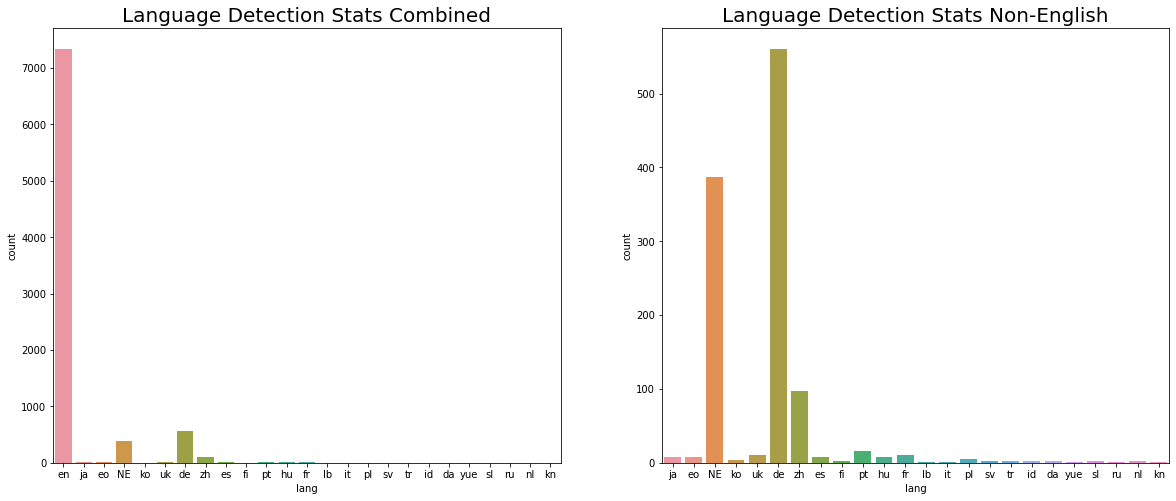

In [49]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df_trans['lang'],ax=ax[0])
ax[0].set_title("Language Detection Stats Combined",fontsize=20)
sns.countplot(x=df_trans[df_trans['lang'] != 'en']['lang'],ax=ax[1])
ax[1].set_title("Language Detection Stats Non-English",fontsize=20)
plt.show()

In [50]:
df_trans['lang'].value_counts(), df_trans['lang'].nunique()

(en     7345
 de      561
 NE      387
 zh       97
 pt       16
 fr       11
 uk       11
 ja        8
 eo        8
 es        8
 hu        8
 pl        5
 ko        4
 fi        3
 sv        3
 nl        3
 tr        2
 id        2
 sl        2
 da        2
 lb        1
 ru        1
 yue       1
 it        1
 kn        1
 Name: lang, dtype: int64, 25)

#### Observations:
1. There are about 25 languages detected by the Fasttext model.
2. 7345 of the overall 8500 records are English, immediately followed by German which 561.

In [52]:
## This line to hold the status of the translation in case if it fails due to network issues
df_trans['trans_status'] = False

In [53]:
df_trans[['translated_text','trans_status']] = df_trans.progress_apply(lambda x: bulk_translate(x),axis=1,result_type='expand')

In [54]:
df_trans[df_trans['trans_status'] == False]

,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text


In [55]:
df_trans[df_trans['translated_text'].apply(lambda x: not isEnglish(x))]['translated_text']

99      password expiry tomorrow \n\nreceived from: ec...
116     server issues \n\nreceived from: bgqpotek.cuxa...
124     mobile device activation from: tvcdfqgp nrbcqw...
162     access to bex \n\nreceived from: yfqoaepn.xnez...
170     [urgent!!] delivery note creation request!!  \...
                              ...                        
8436    bls (beschichtungsleitstand) germany workflow ...
8470    please review your recent ticketing_tool ticke...
8471       I can’t turn on the computer when I turn it on
8480    customer group enhanced field \n\nreceived fro...
8498    machine não está funcionando i am unable to ac...
Name: translated_text, Length: 406, dtype: object

#### There are still a few texts which are categorised as Not English

In [56]:
df_trans['translated_text'] = df_trans['translated_text'].apply(lambda x: fix_accents(x))

In [57]:
df_trans[df_trans['translated_text'].apply(lambda x: not isEnglish(x))]

,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text


In [58]:
df_trans['post_lang'] = df_trans['translated_text'].apply(lambda x : detect_lang(x))

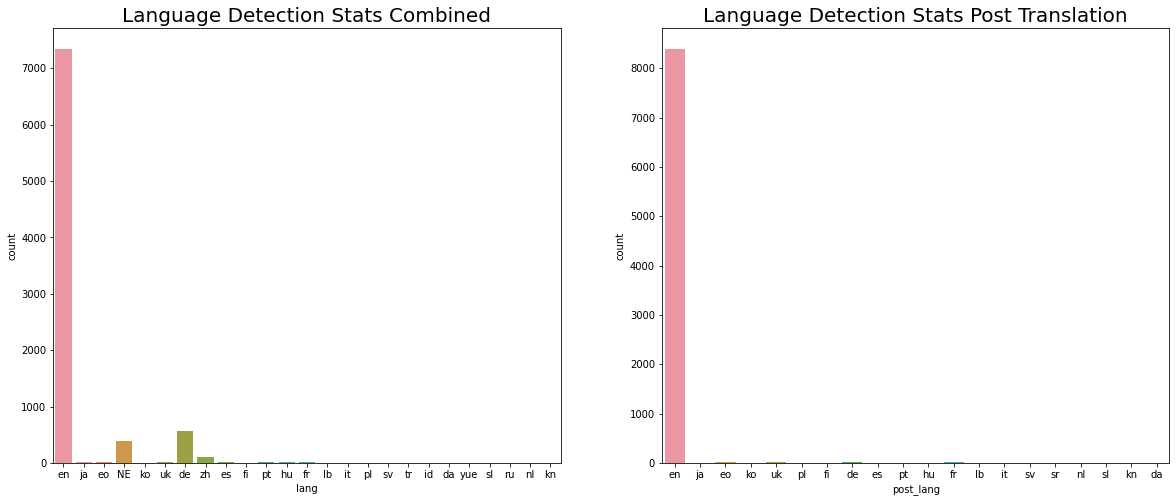

In [59]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df_trans['lang'],ax=ax[0])
ax[0].set_title("Language Detection Stats Combined",fontsize=20)
sns.countplot(x=df_trans['post_lang'],ax=ax[1])
ax[1].set_title("Language Detection Stats Post Translation",fontsize=20)
plt.show()

In [60]:
Counter(df_trans['post_lang'])

Counter({'da': 1,
         'de': 28,
         'en': 8396,
         'eo': 9,
         'es': 5,
         'fi': 4,
         'fr': 9,
         'hu': 5,
         'it': 1,
         'ja': 3,
         'kn': 1,
         'ko': 4,
         'lb': 1,
         'nl': 3,
         'pl': 6,
         'pt': 1,
         'sl': 1,
         'sr': 1,
         'sv': 1,
         'uk': 11})

#### Observatiosn:
1. Post Translation the number of English records have increase to 8396, while there are still traces of other languages 

In [61]:
df_trans[df_trans['post_lang'] == 'de']['translated_text'].sample(10).values

array(['aw: please take this survey related to ticket_no0433617 \n\nreceived from: efjzbtcm.mdpviqbf@gmail.com\n\nnein funktioniert noch nicht\n\n\nefjzbtcm mdpviqbf\ncompany productions gmbh & co. kg\nversand/logistik/ff-wear\n\nemail: efjzbtcm.mdpviqbf@gmail.com<mailto:efjzbtcm.mdpviqbf@gmail.com>\n\ncompany produktions gmbh & co. kg\ngeschaftsfuhrer: phvkowml azbtkqwx, naruedlk mpvhakdq\n\nvon: global it ticketing_tool [mailto:company@ticketing_tool.com]\ngesendet: mittwoch, 24. august 2016 22:02\nan: efjzbtcm mdpviqbf\nbetreff: please take this survey related to ticket_no1544728\n\nplease do not reply to or forward this email. use ticketing_tool to open a new ticket.\n\nwe value your input. please help us by taking the time to fill out this short survey.\n\nclick here to take the survey<\n\n________________________________\n\n\nnumber: ticket_no1544728\nresolved by: olckhmvx pcqobjnd\nshort description: beim offnen oder speichern kommt immer wieder eine meldung\nclick here to view:

In [62]:
len(df_trans[df_trans.duplicated(['translated_text','Assignment group'])]['Assignment group'])

588

In [63]:
df_trans.drop_duplicates(subset=['translated_text','Assignment group'],keep='first',ignore_index=False,inplace=True)

In [64]:
df_trans

,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,en,True,login issue -verified user details.(employee# ...,en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,True,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en,True,cant log in to vpn \r\n\r\nreceived from: eylq...,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en,True,unable to access hr_tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,ja,True,skype error skype error,ja
...,...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail \r\n\r\nrece...,en,True,emails not coming in from zz mail \r\n\r\nrece...,en
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software issue,en,True,telephony_software issue telephony_software issue,en
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,en,True,vip2: windows password reset for tifpdchb pedx...,en
8498,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine não está funcionando i am unable to ac...,pt,True,machine nao esta funcionando i am unable to ac...,en


### Save the translated text file for future reference.

In [65]:
df_trans.to_csv(os.path.join(project_path,'clean_translated.csv')) 

## Pre-Processing (Cleanup)

### Pre-processing helper function

In [67]:
def text_cleanup(text):
  if isinstance(text,str):
    text = text.strip()
    ### Clean up email-contents
    text = re.sub(r'to\:(.*)\n','',text)
    text = re.sub(r'sent\:(.*)\n','',text)
    text = re.sub(r'received from\:(.*)\n','',text)
    text = re.sub(r'received\:(.*)\n','',text)
    text = re.sub(r'from\:(.*)\n','',text)
    text = re.sub(r'cc\:(.*)\n','',text)    
    text = re.sub(r'date\:(.*)\n','',text)
    text = re.sub(r're\:','',text)
    text = re.sub(r'fw\:','',text)
    text = re.sub(r'subject\:','',text)
    text = re.sub(r'begin forwarded message\:','',text)
    text = re.sub(r'sent from my(.*)\n','',text)
    text = re.sub('confidentiality caution:(.*)','',text)
    text = re.sub('please do not print this email(.*)','',text)
    text = re.sub(r'open\:(.*)\n','',text)
    text = re.sub(r'\[cid:.*\]','',text)
    text = re.sub(r'name\:(.*)\n','',text)
    text = re.sub(r'language\:(.*)\n','',text)
    text = re.sub(r'email[\S]+','',text)
    text = re.sub(r'email address[\S]+','',text)
    text = re.sub(r'e-mail[\S]+','',text)
    text = re.sub(r'customer number[\S]+','',text)
    text = re.sub(r'number\[\S+]','',text)
    text = re.sub(r'telephone[\S]+','',text)
    text = re.sub(r'phone[\S]+','',text)
    text = re.sub(r'tel[\S]+','',text)
    text = re.sub(r'mob[\S]+','',text)
    text = re.sub(r'summary\:','',text)

    #### Clenaup part of texts #######
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    # text=text.replace('hello', '')
    # text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    # text=text.replace('hi', '')
    text=text.replace('best', '')
    # # text=text.replace('kind', '')
    text=text.replace('good morning', '')
    # text=text.replace('please', '')
    text=text.replace('regards', '')
    
    ##### Clean up OS Path details

    text = re.sub(r'\<.*?\>+', '', text)
    text = re.sub(r'[\S]+@[\S]+','',text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^\w|.\@]+|[_]',' ',text)


    text = re.sub(r'http\S+','',text)
    text = re.sub(r'https\S+','',text)
    text = re.sub(r'www.\S+','',text)
    text = re.sub(r'\/.+\/\S+','',text)
    text = re.sub(r'[A-Za-z]:\\\S+','',text)
    text = re.sub('(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})','',text)
    text = re.sub(r'\r|\t|\n|\\r|\\t|\\n',' ',text)

    text  = re.sub(r'(?:\d+(\S+)[a-zA-Z]+|[a-zA-Z]+(\S+)\d+|\d+)','',text)
    text = re.sub(r'\s+',' ',text)
    text = unicodedata.normalize('NFC',text)\
            .encode('ascii','ignore')\
            .decode('utf-8')
    text = text.lower()
  else:
    text = ''
  return text

# Lemmatize the text
def get_lemmatized_list_text_blob(tkn_list):
  return [Word(word).lemmatize() for word in tkn_list]

# Bigram and Trigram the text
def bi_tri_grams(words,ngram_type=2,bi_min_count=5,tri_min_count=5,bi_threshold=50,tri_threshold=50):
  bigram = gensim.models.phrases.Phrases(words, min_count=bi_min_count, threshold=bi_threshold)
  bigram_mod = gensim.models.phrases.Phraser(bigram)

  if ngram_type == 2:
    return [bigram_mod[texts] for texts in words]

  if ngram_type == 3:
    trigram = gensim.models.phrases.Phrases(bigram[words],min_count=tri_min_count, threshold=tri_threshold)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    return [trigram_mod[bigram[texts]] for texts in words]


ignore_word_file_path = os.path.join(project_path,"ignore_spellcheck_words.txt")
spelling_checker = SpellChecker(language='en', distance=1)
spelling_checker.word_frequency.load_text_file(ignore_word_file_path)

def check_spelling(input_text_or_list):

    if input_text_or_list is None or len(input_text_or_list) == 0:
        return ''
    # spelling_checker = SpellChecker(language=lang, distance=1)

    # spelling_checker.word_frequency.load_text_file(ignore_word_file_path)
    if isinstance(input_text_or_list, str):
        if not input_text_or_list.islower():
            input_text_or_list = input_text_or_list.lower()
        tokens = word_tokenize(input_text_or_list)
    else:
        tokens = [token.lower() for token in input_text_or_list if token is not None and len(token) > 0]
    misspelled = spelling_checker.unknown(tokens)
    # print(misspelled)
    for word in misspelled:
        tokens[tokens.index(word)] = spelling_checker.correction(word)
    return ' '.join(tokens).strip()


# Snippet to remove caller names
caller_list = []
for idx, callers in df['Caller'].items():
  for names in range(len(callers.split())):
    caller_list.append(callers.split()[names])
caller_list = '|'.join(caller_list)

sw = stopwords.words('english')
sw.extend(['hi','hello','hallo','bye','mailto','please','kind','regards',\
           'january','february','march','april','may','june','july','agust','september','october','november','december'])

contractions.add("i.e","that is")
contractions.add("n","and")
contractions.add("etc","and the rest")
contractions.add("wanna","want to")
contractions.add("wana","want to")
contractions.add("'bout","about")
contractions.add("every1","every one")
contractions.add("gota","got to")
contractions.add("b","be")
contractions.add("gona",'going to')
contractions.add("pls","please")
contractions.add("add","addition")
contractions.add("ins","installation")

# sample_text = df['Description'].iloc[8472]
# print(sample_text)
# print("\n\n*************************************************")
# text_cleanup(sample_text)

df_trans['translated_text'].iloc[163:165].apply(lambda x: text_cleanup(x))

167    user needs training to use engineering tool to...
168    skype not working hello i am unable to access ...
Name: translated_text, dtype: object

In [68]:
def text_preprocess(text,steps=[-1],min_word_length=2,return_as_list=False):

##################### Phase 1 ##############################

  # Step 1: remove all unprintable characters from short and long text
  if 1 in steps or -1 in steps:
    text = text_cleanup(text).lower()

  # Step 2: remove HTML tags if any
  if 2 in steps or -1 in steps:
    text = html.unescape(text.strip()).lower()

  # Step 3: Fix contractions
  if 3 in steps or -1 in steps:
    text = contractions.fix(text).lower()

  # Step 4: Remove users from the text
  if 4 in steps or -1 in steps:
    text = re.sub(caller_list,'',text) 

  # Step 5: Spellcheck
  if 5 in steps or -1 in steps:
    text = check_spelling(text)
  
  # Step 6: Remove punctuations
  if 6 in steps or -1 in steps:
    text = re.sub(r'[^\w]+|[_]',' ',text)
  
  # Step 7: Tokenize words
  if 7 in steps or -1 in steps:
    if isinstance(text,str):
      text = nltk.word_tokenize(text)
    else:
      text = nltk.word_tokenize(' '.join(text))
  
  # Step 8 : Remove stopwords
  if 8 in steps or -1 in steps:
    if isinstance(text,list) :
      text = [tokens for tokens in text if tokens not in sw]
    else:
      return np.nan
  
  # Step 9  : Lemmatize
  if 9 in steps or -1 in steps:
    if isinstance(text,list) :
      # text = get_lemmatized_list(nltk.pos_tag(text))
      # text = get_lemmatized_list_spacy(text)
      text = get_lemmatized_list_text_blob(text)
    else:
      return np.nan
  
  # Step 10 : Filter out  tokens less than min_text_len
  if 10 in steps or -1 in steps:
    if isinstance(text,list):
      text = [tokens for tokens in text if len(tokens) > min_word_length]
    elif isinstance(text,str):
      text = [tokens for tokens in nltk.word_tokenize(text) if len(tokens) > min_word_length]

  if isinstance(text,list):
    if return_as_list:
      return text
    else:
      return ' '.join(t.strip() for t in text )
  elif isinstance(text,str):
    return text    
  else:
    return np.nan


df_trans['translated_text'].iloc[160:168].progress_apply(lambda text: text_preprocess(text,min_word_length=1,steps=[1,2,3,4,5],return_as_list=False)).values


array(['withdrawn ticket comments added windy shi will withdraw the email ticket comments added . this message is only used by designated recipients and it may contain content that is licensed confidential and prohibited from disclosure under applicable laws . except for the designated recipient it is strictly prohibited for anyone else to spread distribute or copy this message . if you have received this message by mistake please notify the sender and delete the message . .',
       'account locked in erp sid account locked in erp sid',
       'job job failed in job scheduler at job job failed in job scheduler at',
       'user needs training to use engineering tool to view drawings . user needs training to use engineering tool to view drawings . connected to the user system using teamviewer . help and educated the user on how login to business client and view drawings . issue resolved .',
       'skype not working hello i am unable to access the skype . the password is showing error 

#### Observations:
1. Text cleanup is working correctly

In [69]:
df_trans['p_desc'] = df_trans['translated_text'].progress_apply(lambda text: text_preprocess(text,min_word_length=1,steps=[-1],return_as_list=False))
df_trans


,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang,p_desc
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,en,True,login issue -verified user details.(employee# ...,en,login issue verified user detail employee mana...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,True,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,outlook team meeting skype meeting rest appear...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en,True,cant log in to vpn \r\n\r\nreceived from: eylq...,en,log vpn log vpn
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en,True,unable to access hr_tool page unable to access...,en,unable access hr tool page unable access hr to...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,ja,True,skype error skype error,ja,skype error skype error
...,...,...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail \r\n\r\nrece...,en,True,emails not coming in from zz mail \r\n\r\nrece...,en,coming ze mail good afternoon receiving sent z...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software issue,en,True,telephony_software issue telephony_software issue,en,issue issue
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,en,True,vip2: windows password reset for tifpdchb pedx...,en,window password reset tifpdchb pedxruyf window...
8498,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine não está funcionando i am unable to ac...,pt,True,machine nao esta funcionando i am unable to ac...,en,machine nao esta funcionando unable access mac...


#### Adding Word count for each processed record.

In [70]:
df_trans['Num_Words'] = df_trans['p_desc'].apply(lambda x : len(x.split()))
df_trans.head()

,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang,p_desc,Num_Words
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,en,True,login issue -verified user details.(employee# ...,en,login issue verified user detail employee mana...,24
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,True,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,outlook team meeting skype meeting rest appear...,12
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en,True,cant log in to vpn \r\n\r\nreceived from: eylq...,en,log vpn log vpn,4
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en,True,unable to access hr_tool page unable to access...,en,unable access hr tool page unable access hr to...,10
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,ja,True,skype error skype error,ja,skype error skype error,4


#### Remove records that hasv 0 word count or no text.

In [71]:
df_trans = df_trans[df_trans['Num_Words'] > 0]
df_trans.isna().sum()

Short description       0
Description             0
Caller                  0
Assignment group        0
combined_description    0
lang                    0
trans_status            0
translated_text         0
post_lang               0
p_desc                  0
Num_Words               0
dtype: int64

#### Add additional labels for testing Scenario 1, 2 and 3

In [72]:
df_trans['isGRP_0'] = df_trans['Assignment group'].apply(lambda x : 1 if x == 'GRP_0' else 0)
df_trans.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang,p_desc,Num_Words,isGRP_0
3334,sound issue : 7350,summary:issue with the sound of the laptop .th...,kexcsbgw lzabjxwf,GRP_0,sound issue : 7350 summary:issue with the soun...,en,True,sound issue : 7350 summary:issue with the soun...,en,sound issue issue sound laptop sound,6,1
2531,password_management_tool password manager change?,\r\n\r\nreceived from: hpqjaory.gfrwmije@gmail...,hpqjaory gfrwmije,GRP_0,password_management_tool password manager chan...,en,True,password_management_tool password manager chan...,en,password management tool password manager chan...,22,1
2201,aiiw8911985 india patching_antivirus_sw deskto...,it is offline since 30th sep 2016.,fohvgnkd stfmcapj,GRP_19,aiiw8911985 india patching_antivirus_sw deskto...,en,True,aiiw8911985 india patching_antivirus_sw deskto...,en,india patching antivirus desktop site server o...,10,0
195,unable to submit expense report as it is locke...,unable to submit expense report as it is locke...,pvbomqht smfkuhwi,GRP_0,unable to submit expense report as it is locke...,en,True,unable to submit expense report as it is locke...,en,unable submit expense report locked user unabl...,12,1
4927,ticket update for inplant_858584,ticket update for inplant_858584,fumkcsji sarmtlhy,GRP_0,ticket update for inplant_858584 ticket update...,en,True,ticket update for inplant_858584 ticket update...,en,ticket update implant ticket update inplant,6,1
7572,答复: email address link to delivery not 转发: 916...,\n\nreceived from: jkmeusfq.vjpckzsa@gmail.com...,jkmeusfq vjpckzsa,GRP_18,答复: email address link to delivery not 转发: 916...,NE,True,Reply: email address link to delivery not forw...,en,reply email address link delivery forwarding s...,14,0
8305,abended job in job_scheduler: SID_35cold,received from: monitoring_tool@company.com\r\n...,ZkBogxib QsEJzdZO,GRP_8,abended job in job_scheduler: SID_35cold recei...,en,True,abended job in job_scheduler: SID_35cold recei...,en,amended job job scheduler sid abended job job ...,10,0
3073,unable to connect to tc78 and tc19,unable to connect to tc78 and tc19,arjpdohf mrqwdtil,GRP_0,unable to connect to tc78 and tc19 unable to c...,en,True,unable to connect to tc78 and tc19 unable to c...,en,unable connect unable connect,4,1
4850,unable to log into skype,\r\n\r\nreceived from: muywpnof.prtikusy@gmail...,muywpnof prtikusy,GRP_0,unable to log into skype \r\n\r\nreceived from...,en,True,unable to log into skype \r\n\r\nreceived from...,en,unable log skype getting error trying log skyp...,23,1
5054,erp SID_34 account unlock,name:mfeyouli ndobtzpw\nlanguage:\nbrowser:mic...,mfeyouli ndobtzpw,GRP_0,erp SID_34 account unlock name:mfeyouli ndobtz...,en,True,erp SID_34 account unlock name:mfeyouli ndobtz...,en,erp sid account unlock browser microsoft inter...,12,1


In [73]:
df_trans['Pass_2_label'] = df_trans['Assignment group'].apply(lambda x : x if x != 'GRP_0' else np.nan)
df_trans.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Short description          0
Description                0
Caller                     0
Assignment group           0
combined_description       0
lang                       0
trans_status               0
translated_text            0
post_lang                  0
p_desc                     0
Num_Words                  0
isGRP_0                    0
Pass_2_label            3422
dtype: int64

In [74]:
df_trans['Assignment level'] = df_trans['Assignment group'].apply(lambda x : 'L1L2' if x in ['GRP_0','GRP_8'] else 'L3')
df_trans.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang,p_desc,Num_Words,isGRP_0,Pass_2_label,Assignment level
5375,"i can't logon erp at home, please help to solv...",\r\n\r\nreceived from: baoapacg.wanrtyg@compan...,rekpvblc ufysatml,GRP_19,"i can't logon erp at home, please help to solv...",en,True,"i can't logon erp at home, please help to solv...",en,logon erp home help solve issue,6,0,GRP_19,L3
3617,engineering_tool not working,name:mikhghytr\nlanguage:\nbrowser:microsoft i...,vcyktjxp uxdojvrq,GRP_0,engineering_tool not working name:mikhghytr\nl...,en,True,engineering_tool not working name:mikhghytr\nl...,en,engineering tool working browser microsoft int...,13,1,NaN,L1L2
3593,awb 0276036761 / sin - jnb,hi johthryugftyson\n\nany update form it team ...,rxoynvgi ntgdsehl,GRP_18,awb 0276036761 / sin - jnb hi johthryugftyson...,en,True,awb 0276036761 / sin - jnb hi johthryugftyson...,en,awe sin job johthryugftyson update form team w...,10,0,GRP_18,L3
513,unlock account the user aeftjxos lhnyofad - id...,"hi team,\ncould you please unlock account the ...",qasdhyzm yuglsrwx,GRP_2,unlock account the user aeftjxos lhnyofad - id...,en,True,unlock account the user aeftjxos lhnyofad - id...,en,unlock account user aeftjxos lhnyofad id vvsar...,27,0,GRP_2,L3
3507,crm app installation,crm app installation,itslpwra vybdkuoa,GRP_0,crm app installation crm app installation,en,True,crm app installation crm app installation,en,crm app installation crm app installation,6,1,NaN,L1L2


In [75]:
df_trans['L1L2'] = df_trans['Assignment group'].apply(lambda x : 'L1' if x == 'GRP_0' else 'L2' if x == 'GRP_8' else np.nan)
df_trans.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang,p_desc,Num_Words,isGRP_0,Pass_2_label,Assignment level,L1L2
8035,warehouse_toolmail not working,my warehouse_toolmail does not seem to be pick...,wgothrzl iokdftgn,GRP_0,warehouse_toolmail not working my warehouse_to...,en,True,warehouse_toolmail not working my warehouse_to...,en,warehouse toolmail working warehouse toolmail ...,20,1,NaN,L1L2,L1
3533,unable to create delivery,please provide the following:\r\n\r\nwhat orde...,mvwiygou rpkscnlv,GRP_6,unable to create delivery please provide the f...,en,True,unable to create delivery please provide the f...,en,unable create delivery provide following order...,19,0,GRP_6,L3,NaN
8422,driver update,\n\nreceived from: kbdljsxf.kcmqtjgf@gmail.com...,kbdljsxf kcmqtjgf,GRP_19,driver update \n\nreceived from: kbdljsxf.kcmq...,NE,True,driver update \n\nreceived from: kbdljsxf.kcmq...,en,driver update team update drive graphic card l...,13,0,GRP_19,L3,NaN
4880,install zebra \we_wu102 \pfjwinbg ljtzbdqg,install zebra \we_wu102 \pfjwinbg ljtzbdqg,pfjwinbg ljtzbdqg,GRP_24,install zebra \we_wu102 \pfjwinbg ljtzbdqg ins...,en,True,install zebra \we_wu102 \pfjwinbg ljtzbdqg ins...,en,install zebra install zebra,4,0,GRP_24,L3,NaN
1223,erp SID_34 password change,name:bettymcdanghtnuell\nlanguage:\nbrowser:mi...,vwaejqrh kmtvyesb,GRP_0,erp SID_34 password change name:bettymcdanghtn...,en,True,erp SID_34 password change name:bettymcdanghtn...,en,erp sid password change browser microsoft inte...,16,1,NaN,L1L2,L1


In [76]:
df_trans.isna().sum()

Short description          0
Description                0
Caller                     0
Assignment group           0
combined_description       0
lang                       0
trans_status               0
translated_text            0
post_lang                  0
p_desc                     0
Num_Words                  0
isGRP_0                    0
Pass_2_label            3422
Assignment level           0
L1L2                    3830
dtype: int64

## (5) EDA Post Text processing

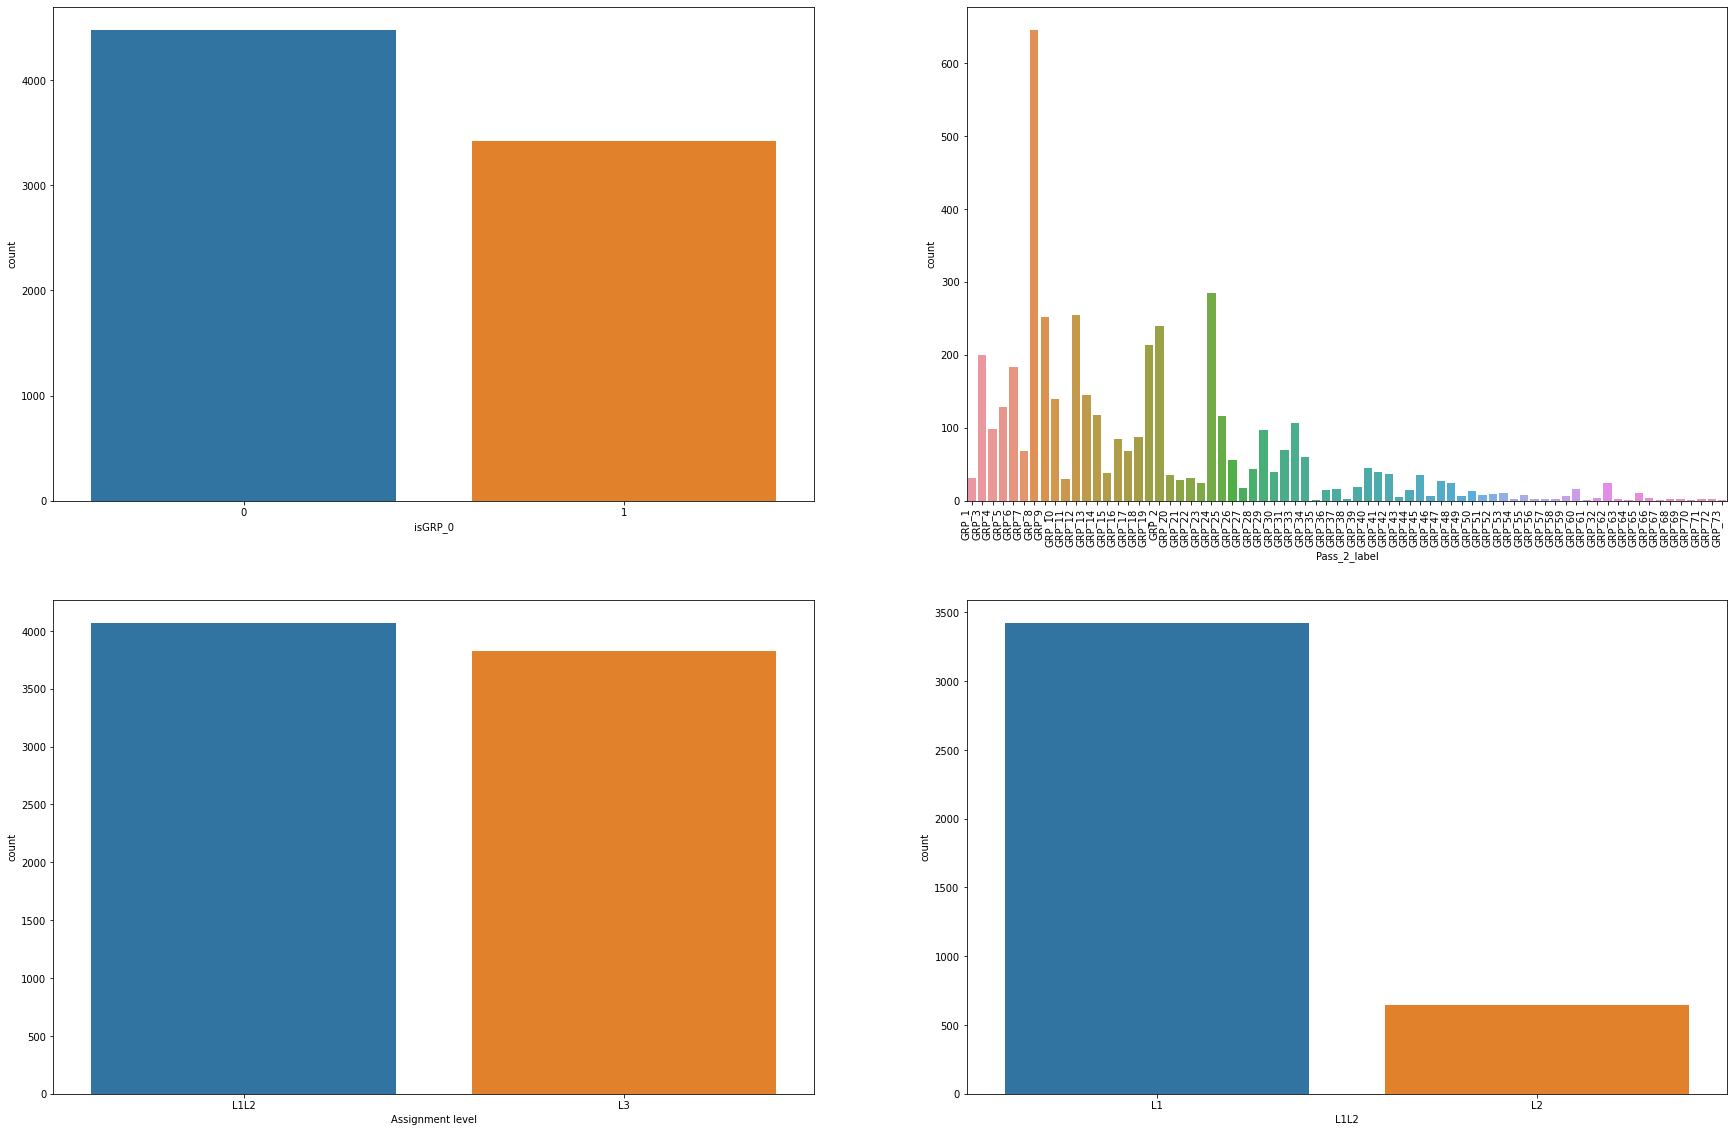

In [77]:
fig,ax = plt.subplots(2,2,figsize=(30,20))
sns.countplot(x=df_trans['isGRP_0'],ax=ax[0][0])
sns.countplot(x=df_trans['Pass_2_label'],ax=ax[0][1])
# ax[0][1].set_xticklabels(ax[0][1].get_xticks(),rotation=50)
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=90, ha='right')
sns.countplot(x=df_trans['Assignment level'],ax=ax[1][0])
sns.countplot(x=df_trans['L1L2'],ax=ax[1][1])
plt.show()

#### Observations:
1. Labels have been correctly applied.

In [90]:
def word_cloud(df,text,label,title='Text Cloud',size=(30,30)):
  categories = list(df[label].value_counts().index)
  
  if len(categories) < 4:
    rows = 1
    cols = len(categories)
  else:
    rows = (len(categories)//4)+1
    cols = 4
  fontsize=40
  # print(len(categories),rows,cols)
  fig  = plt.figure(figsize=size)
  fig.tight_layout(pad=2)
  cloud_text = WordCloud(
                        stopwords=STOPWORDS,
                        background_color='white',
                        collocations=False,
                        # width=800,
                        # height=1000
                        )
  for idx in range(len(categories)):
      plt.subplot(rows,cols,idx+1)
      doc_list = df[df[label] == categories[idx]][text].values
      cloud_text.generate(" ".join(doc_list))
      plt.axis('off')
      plt.title(f'Word cloud {text} / {label} - {categories[idx]}',fontsize=fontsize//cols)
      plt.imshow(cloud_text)
  # fig.suptitle(f"Text field : {text} & Label : {label}",fontsize = 30,weight = 'bold',y=0.9)
  fig.show()


def word_cloud_full(doc_list,title='Text Cloud',size=(30,30)):
  plt.figure(figsize=size)
  # text = df['p_text'].values
  cloud_text = WordCloud(
                            stopwords=STOPWORDS,
                            background_color='black',
                            collocations=False,
                            width=2500,
                            height=1800
                          ).generate(" ".join(doc_list))

  plt.axis('off')
  plt.title(title,fontsize=40)
  plt.imshow(cloud_text)
  plt.show()


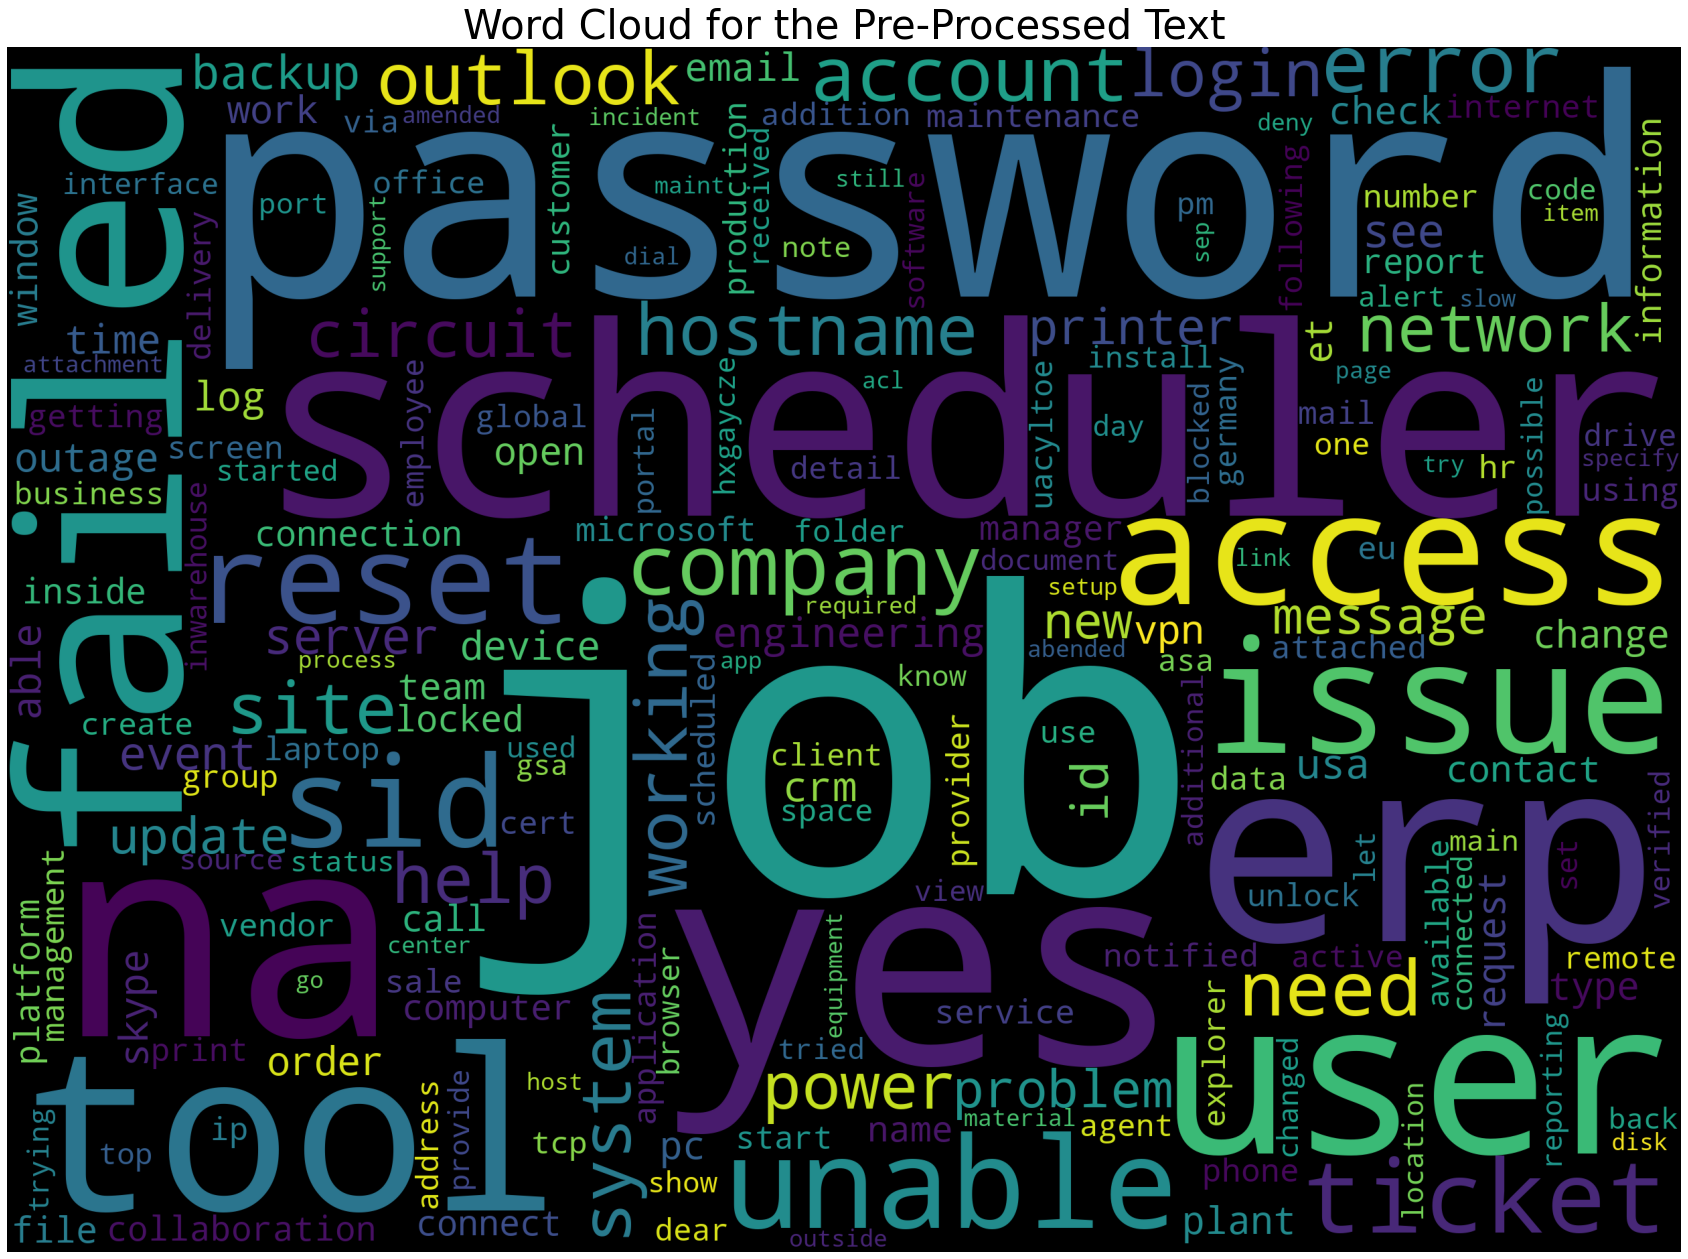

In [91]:
word_cloud_full(df_trans['p_desc'],title="Word Cloud for the Pre-Processed Text")

In [79]:
for labels in ['isGRP_0','Assignment level','L1L2','Pass_2_label']:
  word_cloud(df_trans,'p_desc',labels)

Output hidden; open in https://colab.research.google.com to view.

In [80]:
from nltk.tokenize import RegexpTokenizer
def get_word_len(text):
  tokenizer = RegexpTokenizer("[\w']+")
  return len(tokenizer.tokenize(text))
  

df_trans['num_words_short'] = df_trans['Short description'].apply(lambda x : get_word_len(x))
df_trans['num_words_long'] = df_trans['Description'].apply(lambda x : get_word_len(x))
df_trans.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang,p_desc,Num_Words,isGRP_0,Pass_2_label,Assignment level,L1L2,num_words_short,num_words_long
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,en,True,login issue -verified user details.(employee# ...,en,login issue verified user detail employee mana...,24,1,NaN,L1L2,L1,2,33
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,True,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,outlook team meeting skype meeting rest appear...,12,1,NaN,L1L2,L1,1,29
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en,True,cant log in to vpn \r\n\r\nreceived from: eylq...,en,log vpn log vpn,4,1,NaN,L1L2,L1,5,14
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en,True,unable to access hr_tool page unable to access...,en,unable access hr tool page unable access hr to...,10,1,NaN,L1L2,L1,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,ja,True,skype error skype error,ja,skype error skype error,4,1,NaN,L1L2,L1,2,2


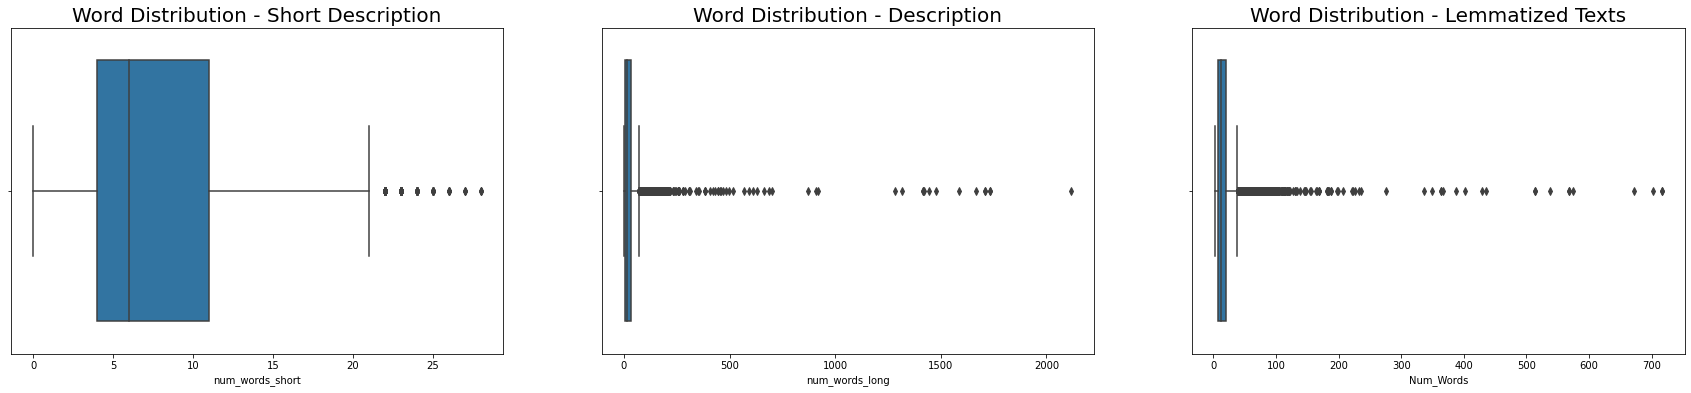

,count,mean,std,min,25%,50%,75%,95%,99%,max
num_words_short,7897.0,7.686843,4.748601,0.0,4.0,6.0,11.0,17.0,22.00,28.0
num_words_long,7897.0,32.197417,80.399121,0.0,7.0,17.0,33.0,108.2,202.04,2119.0
Num_Words,7897.0,19.731164,31.839986,2.0,8.0,12.0,20.0,56.0,106.08,717.0


In [81]:
fig, ax = plt.subplots(1,3,figsize=(30,6))
sns.boxplot(x=df_trans['num_words_short'],ax=ax[0])
ax[0].set_title("Word Distribution - Short Description",fontsize=20)
sns.boxplot(x=df_trans['num_words_long'],ax=ax[1])
ax[1].set_title("Word Distribution - Description",fontsize=20)
sns.boxplot(x=df_trans['Num_Words'],ax=ax[2])
ax[2].set_title("Word Distribution - Lemmatized Texts",fontsize=20)
plt.show()

df_trans[['num_words_short','num_words_long','Num_Words']].describe(percentiles=[0.25,0.5,0.75,0.95,0.99]).T

#### Observations:
1. The average number of words has significantly reduced to 50% at the 95th percentile.
2. This leads to the value of the maxu=imum sequence length that nees to be used during the model building.

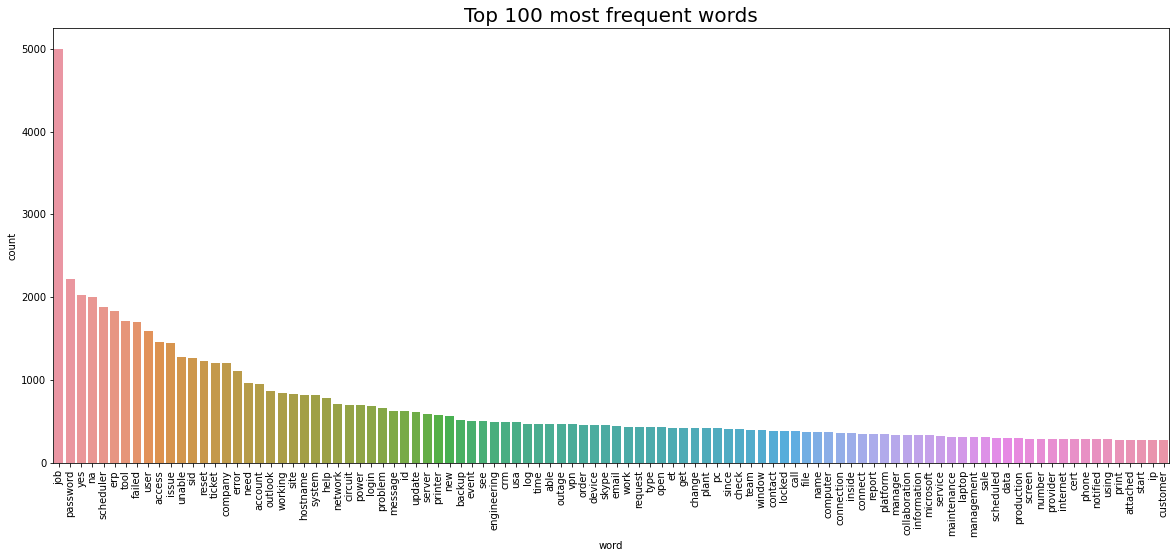

In [82]:
def create_word_frequencies(corpus):
  wordcount_ = Counter()
  for text in corpus:
    wordcount_.update(text.split())
  return wordcount_

top_k = 100
word_count = create_word_frequencies(df_trans['p_desc'].values)
common_wc = word_count.most_common(top_k)
wc_df = pd.DataFrame.from_dict(dict(common_wc),orient='index').reset_index().rename(columns={'index':'word',0:'count'})

plt.subplots(figsize=(20,8))
sns.barplot(x=wc_df['word'],y=wc_df['count'])
plt.xticks(rotation=90)
plt.title(f"Top {top_k} most frequent words",fontsize=20)
plt.show()

#### Obserbations:
1. Words like Job, passowrd, scheduler ate most frequent words in the dataset.

In [84]:
def plot_tsne(df,text,label,size=(20,20),title='TSNE PLOT'):
  tfidf = TfidfVectorizer(max_features=10000, analyzer = 'word', ngram_range=(1, 2))
  tfidf_trans = tfidf.fit_transform(df[text])
  tsne_data = TSNE(n_components=2).fit_transform(tfidf_trans)
  plt.figure(figsize=size)
  for i, t in enumerate(set(df_trans[label])):
    idx = df_trans[label] == t
    plt.scatter(tsne_data[idx, 0], tsne_data[idx, 1], label=t)   
  plt.title(title,fontsize=20)
  plt.legend(bbox_to_anchor=(1, 1))
  plt.show()



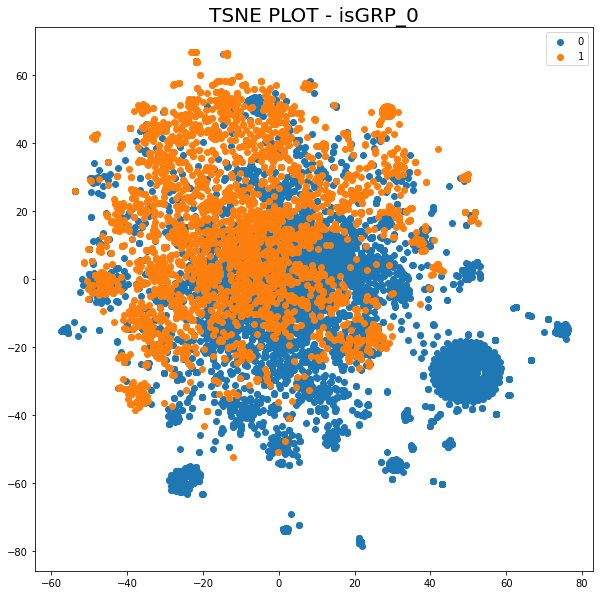

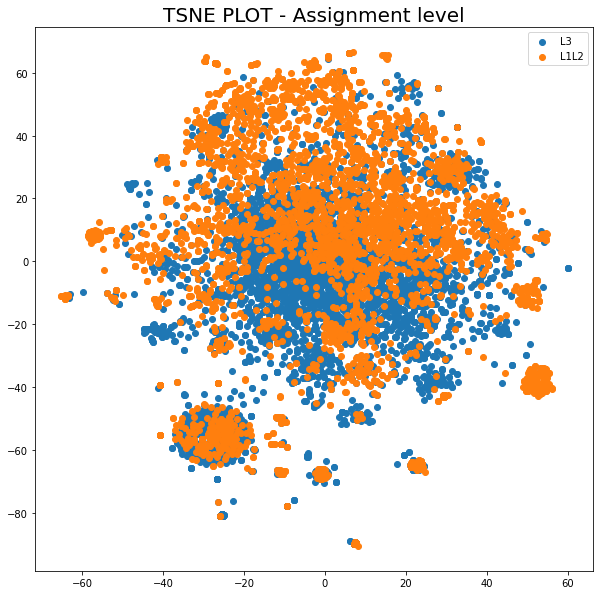

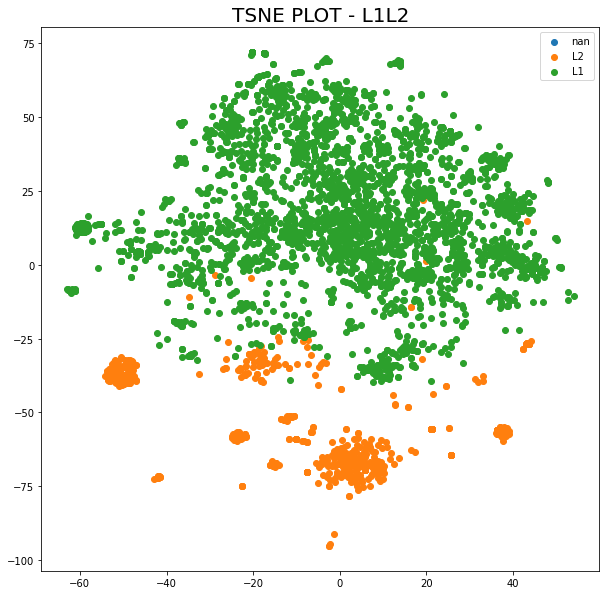

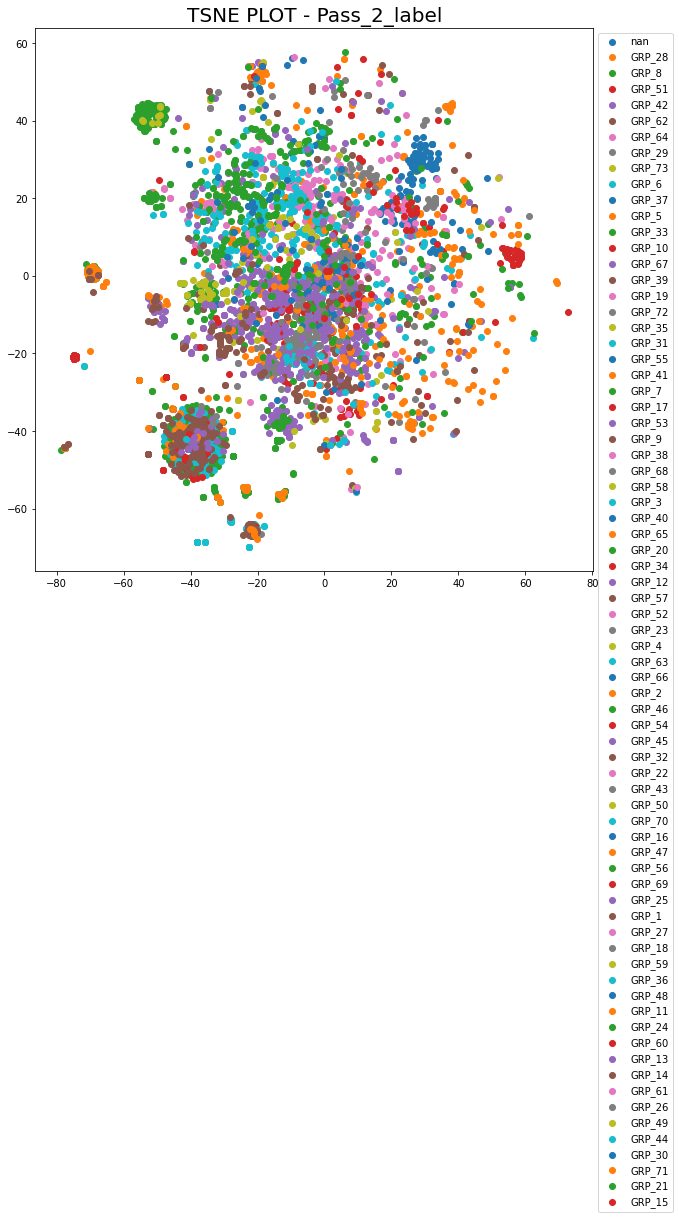

In [85]:
for labels in ['isGRP_0','Assignment level','L1L2','Pass_2_label']:
  plot_tsne(df_trans,'p_desc',labels,size=(10,10),title=f"TSNE PLOT - {labels}")




#### Observations:
1. It's interesting to see that regradles show cluttered all groups are Group0 and Group 8 are clearly seperable and we expevct it to drive higher accuracies.
2. isGRP_0 label also shows good seperation of labels.

#### Save the processed file to be used for model building

In [86]:
df_trans.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group',
       'combined_description', 'lang', 'trans_status', 'translated_text',
       'post_lang', 'p_desc', 'Num_Words', 'isGRP_0', 'Pass_2_label',
       'Assignment level', 'L1L2', 'num_words_short', 'num_words_long'],
      dtype='object')

In [93]:
df_trans.to_csv(os.path.join(project_path,"processed_input.csv"),index=False)

In [127]:
df[df['Description'].str.contains(r'[\u4e00-\u9fff\u00C0-\u017F]+')].iloc[-7:-6]

,Short description,Description,Caller,Assignment group
8457,æ— æ³•ç™»é™†hr_toolè€ƒå‹¤ç³»ç»Ÿ,æ˜¾ç¤ºjavaæ’ä»¶æ— æ³•åŠ è½½ï¼Œæ‰€éœ€ç‰ˆæœ¬1.8...,kyagjxdh dmtjpbnz,GRP_30


In [121]:
df_trans[df_trans['Description'].str.contains(r'[\u4e00-\u9fff\u00C0-\u017F]+')].iloc[-5:-4]



,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang,p_desc,Num_Words,isGRP_0,Pass_2_label,Assignment level,L1L2,num_words_short,num_words_long
8457,无法登陆hr_tool考勤系统,"显示java插件无法加载,所需版本1.8.0.-45或更高版本。",kyagjxdh dmtjpbnz,GRP_30,"无法登陆hr_tool考勤系统 显示java插件无法加载,所需版本1.8.0.-45或更高版本。",zh,True,Unable to log in to the hr_tool attendance sys...,en,unable log hr tool attendance system show java...,13,0,GRP_30,L3,NaN,1,5


# (6) Conclusion

The following steps in chronological order have been used to clean up the  text. The following steps are executed after all NaN values are removed.

1. **Fix text encoding :** This steps fixes the broken unicode while interoperation. FTFY is used for this purpose.  
2. **Combine Text data :** This step combines the “Short description” and “Description” to form a single textual column for all further analysis and modelling.
3. **Language Identification :** There are about 12%  records in different languages. This would need translation so that we do not lose important data. Longer the text better the identification.
4. **Language Translation:** Records identified as a different language or other than English are only subjected to translation. We are using Google’s Web API for translation and there is a limit on the free quota per day. hence, being careful about what texts to translate or otherwise. We also checkpoint the records that are translated to ensure that the translation task can start from a point last left. This will save both time and resources. Interestingly, we still see some texts identified as non-English even after translation and it appears that FastText finds patterns such as names or locations in the translated text. 
5. **Case Normalization:** Henceforth, all text cleanup and pre-processing would be performed on case normalized (Lower Case) text.
Text Cleanup: This step is extremely important and seems to have a bearing on the classification task. The tickets are raised and exchanged through emails and hence the text mostly contains email tags. Some of them are listed below that are cleaned up as these texts do not provide much information to the model.
>1. Email Tags:
>2. Received From:
>3. Sent to:
>4. fw:
>5. cc:
>6.Subject:
>7.Date:
>8.Salutation (Hi,hello, bye etc)
>9. Footer / Disclaimer (Please do not reply to this message etc)
>10. HTML tags : <html\>
>11.Numbers : 0-9
>12.AlphaNumeric : [a-z|A-Z]+[0-9]
>13.Punctuation: .?!@#$%^&*_+,... etc
>14.URLs: http://dfghj.com. www.google.com, etc
6. **Fix Contractions:** Words  can often be contracted into shorter words such as couldn’t which means could not. These words have to be decontracted to make more sense to contextual models. We have used Python Library Contractions for this purpose.
7..**Spell Check:** Texts also contain spelling mistakes that also need to be corrected. Python library PySpellChecker has been used for this purpose.
Additional cleanup of punctuation marks: This is an additional cleanup step to remove any remaining traces of punctuation: 
8.**Text Preprocessing:** This is a prerequisite step to modelling. Steps involve,
9.**Tokenization :** A sentence that is made up of words is broken down into individual tokens. These tokens are words if they contain only words or it could also include punctuation marks as tokens combined with the words. In our case these are only words.
10.**Remove stop words :** Stop words do not add much value to features and the model is removed such as “the”, “was” etc.
11.**Lemmatization:** This process reduces words to their root word. Example : running is reduced to run. We have used TextBlob for this purpose  due to its comparatively simple yet powerful interface.


The translated and processed filw will be used for modelling in the next step



In [92]:
import time
time.sleep(7200)

KeyboardInterrupt: ignored